# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [2]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [5]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [6]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [7]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [18]:
accuracy=[]
for i in range (25):
  testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
  print('Number of test samples = ', len(testlabel))
  print('Number of other samples = ', len(alltrainlabel))
  accuracy.append((len(testlabel)*100/len(dataset.target)))
  
print(accuracy)

Number of test samples =  4118
Number of other samples =  16522
Number of test samples =  4131
Number of other samples =  16509
Number of test samples =  4114
Number of other samples =  16526
Number of test samples =  4148
Number of other samples =  16492
Number of test samples =  4170
Number of other samples =  16470
Number of test samples =  4044
Number of other samples =  16596
Number of test samples =  4089
Number of other samples =  16551
Number of test samples =  4024
Number of other samples =  16616
Number of test samples =  4129
Number of other samples =  16511
Number of test samples =  4137
Number of other samples =  16503
Number of test samples =  4166
Number of other samples =  16474
Number of test samples =  4114
Number of other samples =  16526
Number of test samples =  4139
Number of other samples =  16501
Number of test samples =  4053
Number of other samples =  16587
Number of test samples =  4184
Number of other samples =  16456
Number of test samples =  4156
Number of

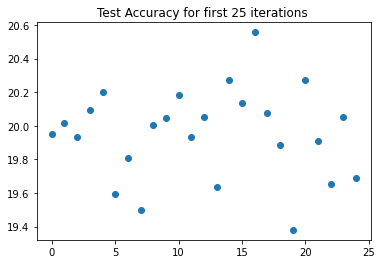

In [31]:

plt.scatter(np.arange(0, 25).tolist(), accuracy)
plt.title("Test Accuracy for first 25 iterations ")
plt.show()

## Experiments with splits

Let us reserve some of our train data as a validation set

In [19]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [25]:
knn_train_acc = []
rc_train_acc=[]

for i in range (10):
  trainpred = NN(traindata, trainlabel, traindata)
  #trainAccuracy = Accuracy(trainlabel, trainpred)
  knn_train_acc.append(Accuracy(trainlabel, trainpred))

  trainpred = RandomClassifier(traindata, trainlabel, traindata)
  trainAccuracy = Accuracy(trainlabel, trainpred)
  rc_train_acc.append(Accuracy(trainlabel, trainpred))

print("KNN train Accuracy:", knn_train_acc)
print("Random Classifier train accuracy:", rc_train_acc)

KNN train Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Random Classifier train accuracy: [0.1646586345381526, 0.16056224899598392, 0.16714859437751003, 0.16883534136546186, 0.16610441767068274, 0.16377510040160642, 0.16497991967871486, 0.17116465863453814, 0.16072289156626507, 0.1636144578313253]


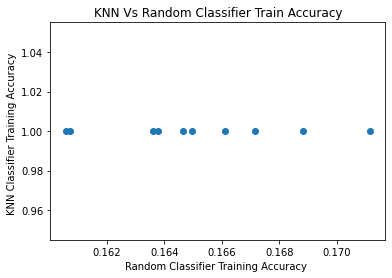

In [35]:
plt.scatter(rc_train_acc, knn_train_acc)
plt.xlabel("Random Classifier Training Accuracy ")
plt.ylabel("KNN Classifier Training Accuracy ")
plt.title("KNN Vs Random Classifier Train Accuracy")
plt.show()

For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [37]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.35239941832283084
Validation accuracy using random classifier is  0.16747455162384878


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [40]:
valAccuracyNN = []
valAccuracyRC= []
for i in range(15):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
  valpredNN = NN(traindata, trainlabel, valdata)
  valAccuracyNN.append(Accuracy(vallabel, valpredNN))
  valpredRC = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracyRC.append(Accuracy(vallabel, valpredRC))
  #print("Validation accuracy of nearest neighbour is ", valAccuracy)

In [41]:
print(valAccuracyNN)
print(valAccuracyRC)

[0.3443757725587145, 0.34829314872284556, 0.3466634545892556, 0.3442860594346461, 0.3456669912366115, 0.33177684934873436, 0.35175879396984927, 0.3481887511916111, 0.3415559772296015, 0.3357108892058963, 0.3439536567704562, 0.3439767779390421, 0.3374307061942637, 0.3512527365604476, 0.3317411034153332]
[0.17181705809641531, 0.16065886846502744, 0.16622500602264514, 0.1688813723121527, 0.1794060370009737, 0.16564266404521996, 0.1631969370662838, 0.1704003813155386, 0.16816888045540798, 0.17070851165002376, 0.17402848177649047, 0.1632801161103048, 0.16341287057122197, 0.17684261736803697, 0.17817052782421783]


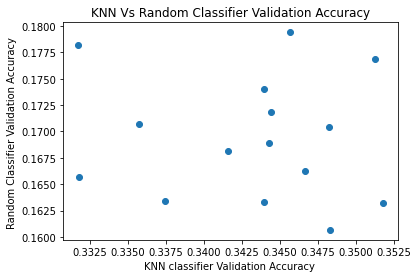

In [43]:
plt.scatter(valAccuracyNN, valAccuracyRC)
plt.xlabel("KNN classifier Validation Accuracy ")
plt.ylabel("Random Classifier Validation Accuracy ")
plt.title("KNN Vs Random Classifier Validation Accuracy")
plt.show()

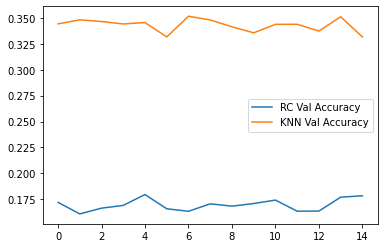

In [52]:

plt.plot(valAccuracyRC, label = 'RC Val Accuracy') 
plt.plot(valAccuracyNN, label = 'KNN Val Accuracy')
plt.legend()

In [53]:
# increase the split for validation 
valAccuracyNN = []
valAccuracyRC= []
for i in range(15):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 25/100)
  valpredNN = NN(traindata, trainlabel, valdata)
  valAccuracyNN.append(Accuracy(vallabel, valpredNN))
  valpredRC = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracyRC.append(Accuracy(vallabel, valpredRC))
  #print("Validation accuracy of nearest neighbour is ", valAccuracy)

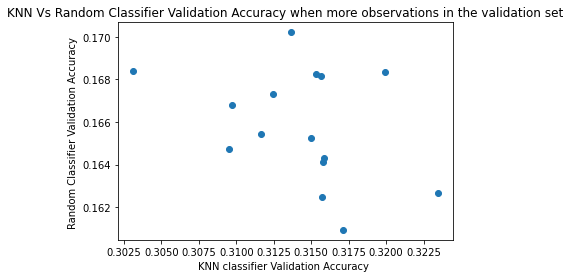

In [54]:
plt.scatter(valAccuracyNN, valAccuracyRC)
plt.xlabel("KNN classifier Validation Accuracy ")
plt.ylabel("Random Classifier Validation Accuracy ")
plt.title("KNN Vs Random Classifier Validation Accuracy when more observations in the validation set")
plt.show()

Text(0.5, 1.0, 'KNN Vs Random Classifier Validation Accuracy when more observations in the validation set')

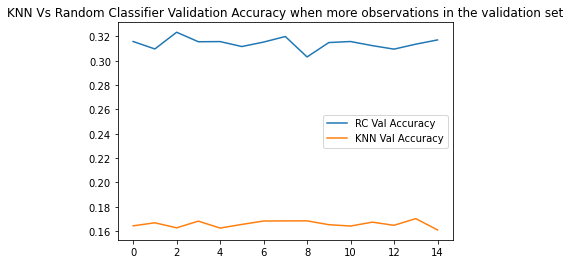

In [56]:
plt.plot(valAccuracyNN, label = 'RC Val Accuracy') 
plt.plot(valAccuracyRC, label = 'KNN Val Accuracy')
plt.legend()
plt.title('KNN Vs Random Classifier Validation Accuracy when more observations in the validation set')

In [66]:
# increase the split for validation 
valAccuracyNN = []
valAccuracyRC= []
for i in range(15):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 10/100)
  valpredNN = NN(traindata, trainlabel, valdata)
  valAccuracyNN.append(Accuracy(vallabel, valpredNN))
  valpredRC = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracyRC.append(Accuracy(vallabel, valpredRC))
  #print("Validation accuracy of nearest neighbour is ", valAccuracy)

Text(0.5, 1.0, 'KNN Vs Random Classifier Validation Accuracy when further more observations are increased in the validation set')

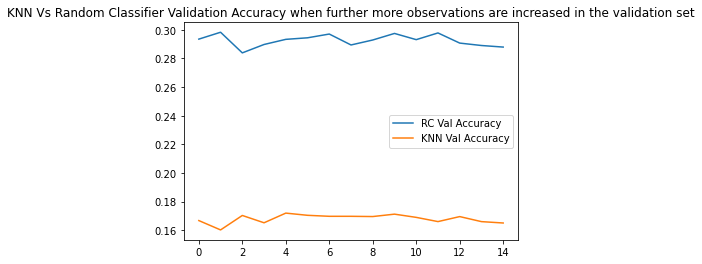

In [58]:
plt.plot(valAccuracyNN, label = 'RC Val Accuracy') 
plt.plot(valAccuracyRC, label = 'KNN Val Accuracy')
plt.legend()
plt.title('KNN Vs Random Classifier Validation Accuracy when further more observations are increased in the validation set')

In [63]:
# increase the split for validation 
valAccuracyNN = []
valAccuracyRC= []
for i in range(15):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 60/100)
  valpredNN = NN(traindata, trainlabel, valdata)
  valAccuracyNN.append(Accuracy(vallabel, valpredNN))
  valpredRC = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracyRC.append(Accuracy(vallabel, valpredRC))
  #print("Validation accuracy of nearest neighbour is ", valAccuracy)

Text(0.5, 1.0, 'KNN Vs Random Classifier Validation Accuracy when 60-40 split between train and validation sets')

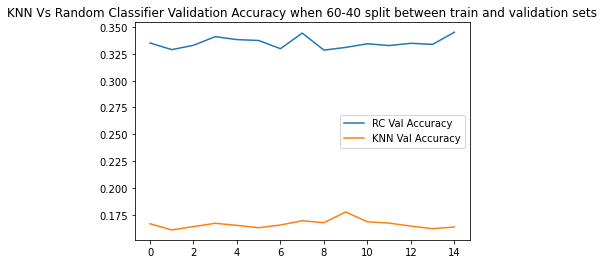

In [64]:
plt.plot(valAccuracyNN, label = 'RC Val Accuracy') 
plt.plot(valAccuracyRC, label = 'KNN Val Accuracy')
plt.legend()
plt.title('KNN Vs Random Classifier Validation Accuracy when 60-40 split between train and validation sets')

In [59]:
# increase the split for validation 
valAccuracyNN = []
valAccuracyRC= []
for i in range(15):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 50/100)
  valpredNN = NN(traindata, trainlabel, valdata)
  valAccuracyNN.append(Accuracy(vallabel, valpredNN))
  valpredRC = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracyRC.append(Accuracy(vallabel, valpredRC))
  #print("Validation accuracy of nearest neighbour is ", valAccuracy)

Text(0.5, 1.0, 'KNN Vs Random Classifier Validation Accuracy when 50-50 split between train and validation set')

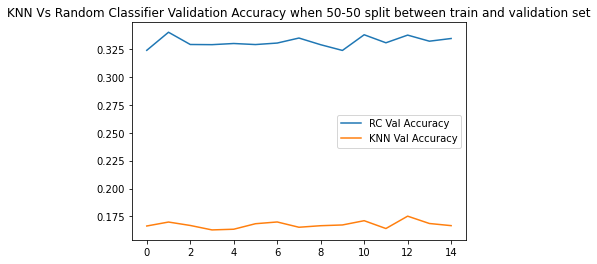

In [60]:
plt.plot(valAccuracyNN, label = 'RC Val Accuracy') 
plt.plot(valAccuracyRC, label = 'KNN Val Accuracy')
plt.legend()
plt.title('KNN Vs Random Classifier Validation Accuracy when 50-50 split between train and validation set')

You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [67]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.35654527559055116


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

In [ ]:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

From the above graphs, 

By increasing number of observations in the validation set, the accuracy decreases (10% for train and 90% for validation)

By equally dividing the observation for test and validation, reveals a margina increase in accuracy compare to above split(10% train, 90% valid)

By spliting 60% for training and 40% for validation, the accuracy has better accuracy than the above two split types. 

Thereby, sufficient samples for the training is significantly needed to see considerable accuracy growth 



2.  How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

In this present case, when we ran the train models with 10% and 50% split of train data, did not affect the accuracy. But practically
we can approximately have same accuracies during the testing and validation of the models


3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?
As had been taught and based on the practical knowledge 70% for train and 30% for test will be good split. 
If we have really a huge sample size we can also go for 80% for training and 20% for test



## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [68]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [69]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3449953799683082
test accuracy is  0.35654527559055116


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [ ]:
1. Does averaging the validation accuracy across multiple splits give more consistent results?
yes

2. Does it give more accurate estimate of test accuracy?
yes

3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
We can have a range of accuracy with several iterations, yes better estimate can be obtained.  

4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
It cannot be possible if the number of observations are less for the training. We cannot have better accuracy by only increasing the iterations. We can only have 
better approriate accuracy value by increasing the iterations